In [16]:
# Notebook to create basic high-level plots of ENSO and malaria incidence data

# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load data
country_data = pd.read_csv('~/ENSO-malaria-analysis/data/country_info.csv')
oceanic_nino_index_data = pd.read_csv('~/ENSO-malaria-analysis/data/oni_ts.csv')
pf_incidence_data = pd.read_csv('~/ENSO-malaria-analysis/data/PFIncidence_global_admin1.csv')

# extract ISO codes for African countries
country_data_africa = country_data.loc[country_data['region'] == 'Africa']
iso_africa = list(set(country_data_africa['alpha-3']))

# extract incidence data for African countries
africa_incidence_data = pf_incidence_data.loc[pf_incidence_data['ISO'].isin(iso_africa)]
years = africa_incidence_data.Year.unique()

,SEAS,YR,TOTAL,ANOM
0,DJF,1950,24.72,-1.53
1,JFM,1950,25.17,-1.34
2,FMA,1950,25.75,-1.16
3,MAM,1950,26.12,-1.18
4,AMJ,1950,26.32,-1.07
...,...,...,...,...
867,MAM,2022,26.62,-1.07
868,AMJ,2022,26.83,-1.00
869,MJJ,2022,26.79,-0.86
870,JJA,2022,26.48,-0.82


In [68]:
# plot Oceanic Nino Index - mean and max values
oni_yearly_means = oceanic_nino_index_data.groupby('YR', as_index=False)['ANOM'].mean()
oni_yearly_means.columns = ['Year', 'ONI Anomaly (Mean)']

oni_yearly_max = oceanic_nino_index_data.groupby('YR', as_index=False)['ANOM'].max()
oni_yearly_max.columns = ['Year', 'ONI Anomaly (Max)']
oni_yearly = pd.concat([oni_yearly_means.Year, oni_yearly_means['ONI Anomaly (Mean)'], oni_yearly_max['ONI Anomaly (Max)']], axis=1)
oni_yearly = oni_yearly.melt('Year', var_name='cols', value_name='vals')


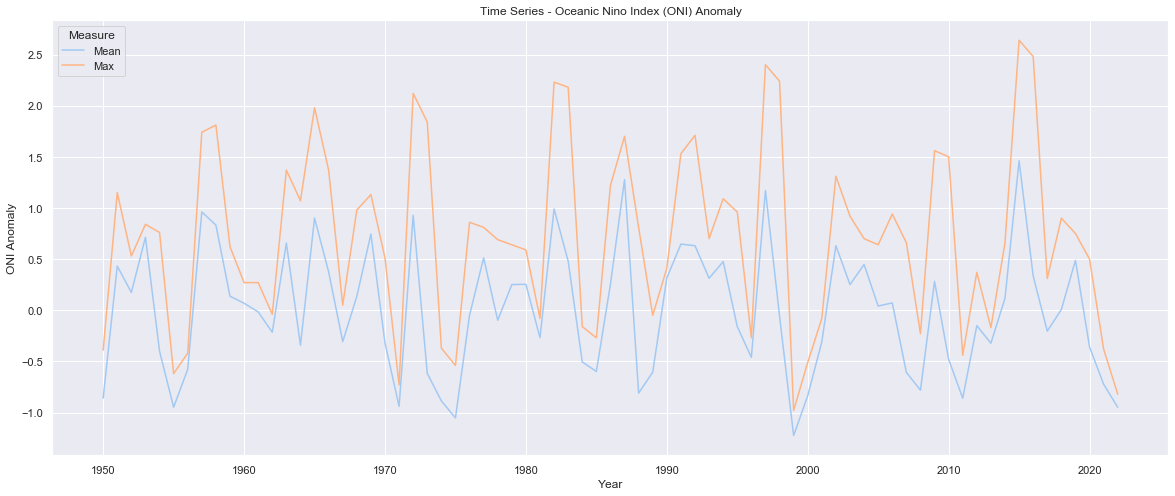

In [79]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(20,8)})
sns.set_palette("pastel")

ax = sns.lineplot(x="Year", y="vals", hue='cols', data=oni_yearly)
ax.set(ylabel='ONI Anomaly', title='Time Series - Oceanic Nino Index (ONI) Anomaly')
plt.legend(title='Measure', loc='upper left', labels=['Mean', 'Max'])
